<a href="https://colab.research.google.com/github/lhojun/doit_deep_learning/blob/main/DeepLearning_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Do it 딥러닝!</h1>
<h2>* 1일차 - 12월 27일(일)</h2>


In [ ]:
print("Hello World!~")

Hello World!~


## **넘파이와 Matplotlib 다루기**

넘파이로 배열을 만든다.</br>
np.array로 생성 가능.</br>
type()으로 타입 확인 가능</br>

In [ ]:
import numpy as np
my_List = np.array([[1,2,3],[4,5,6]])
print(my_List)
type(my_List) #코드 셀의 마지막 줄은 print를 해주지 않아도 출력이 된다.

[[1 2 3]
 [4 5 6]]


numpy.ndarray

### Matplotlib</br>
파이썬 과학 생태계의 표준 그래프 패키지</br>

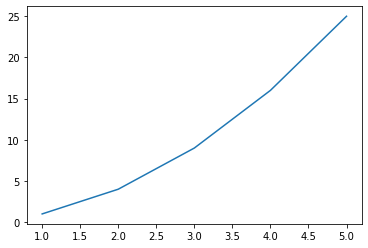

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],[1,4,9,16,25]) #x축, y축 값을 전달
plt.show() #그래프 출력

####산점도를 그릴수도 있다.</br>
산점도란 -> 데이터의 x축, y축을 이용하여 <strong>점</strong>으로 그래프를 그린다.

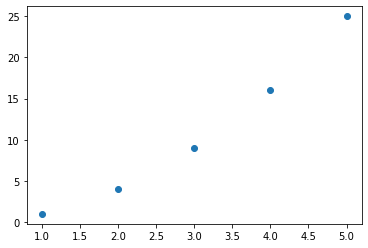

In [ ]:
plt.scatter([1,2,3,4,5],[1,4,9,16,25])
plt.show()

#### 넘파이 배열로 산점도 그리기
넘파이 배열과 넘파이의 랜덤함수를 이용하여</br>
표준 정규 분포를 따르는 난수를 생성한 뒤 산점도를 그림

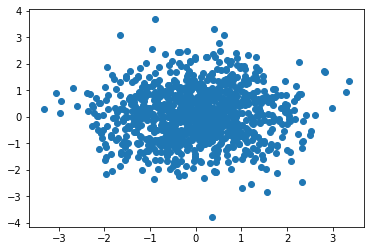

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(1000) #표준 정규 분포를 따르는 난수 1,000개 생성
y = np.random.randn(1000) #표준 정규 분포를 따르는 난수 1,000개 생성
plt.scatter(x,y)
plt.show()

<h1>Do it 딥러닝!</h1>
<h2>* 2일차 - 12월 28일(월)</h2>


## **선형회귀**

**선형회귀는 기울기와 절편을 찾는다.**

기울기가 7이고 절편이 4인 1차 함수 y = 7x + 4가 있다.
x가 10이면 y는?

**y = 74**

보통 1차함수 문제는 이런식으로 x에 따른 y의 값을 찾는데 집중한다.

그러나 선형회귀에서는 이와 반대로 x,y가 주어졌을 때 기울기와 절편을 찾는데 집중한다.

---
x가 3일때 y는 25, x가 4일때 y는 32, x가 5일때 y는 39라면 기울기와 절편의 값으로 적절한 것은?
1. 기울기 6, 절편 4
2. 기울기 7, 절편 5
3. 기울기 7, 절편 4



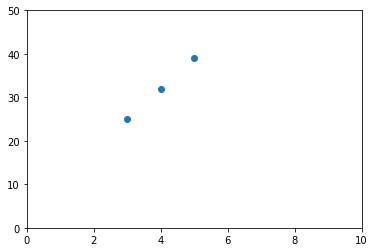

In [ ]:
import matplotlib.pyplot as plt

plt.scatter([3,4,5],[25,32,39])
plt.xlim([0,10])
plt.ylim([0,50])
# plt.axis([0,10,0,50]) 위 두개와 동일한 기능을 함
plt.show()

**1번 (기울기 6, 절편 4)의 경우**

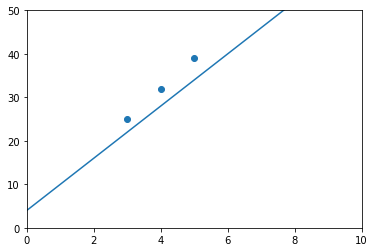

In [ ]:
import matplotlib.pyplot as plt

def y(x):
  return 6*x + 4

ans_List = list()
for i in range(0,10):
  ans_List.append(y(i))


plt.scatter([3,4,5],[25,32,39])
plt.plot(range(0,10),ans_List)
plt.xlim([0,10])
plt.ylim([0,50])
plt.show()

**2번 (기울기 7, 절편 5)의 경우**

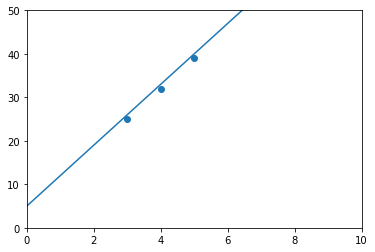

In [ ]:
import matplotlib.pyplot as plt

def y(x):
  return 7*x + 5

ans_List = list()
for i in range(0,10):
  ans_List.append(y(i))


plt.scatter([3,4,5],[25,32,39])
plt.plot(range(0,10),ans_List)
plt.xlim([0,10])
plt.ylim([0,50])
plt.show()

**3번 (기울기 7, 절편 4)의 경우**

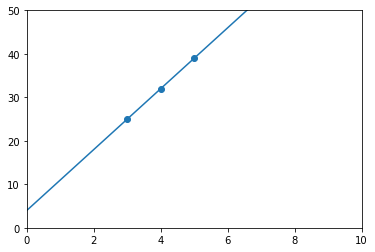

In [ ]:
import matplotlib.pyplot as plt

def y(x):
  return 7*x + 4

ans_List = list()
for i in range(0,10):
  ans_List.append(y(i))


plt.scatter([3,4,5],[25,32,39])
plt.plot(range(0,10),ans_List)
plt.xlim([0,10])
plt.ylim([0,50])
plt.show()

**3번의 조건을 가진 일차함수가 점들을 가장 잘 표현한다!**

위 1차 함수들을 **'선형 회귀로 만든 모델'** 이라고 하며,</br>
마지막에 만들어진 1차 함수가 **'최적의 선형 회귀 모델'**임

##당뇨병 환자의 1년 후 병의 진전된 정도를 예측하는 모델 생성

###사이킷런에서 당뇨병 환자 데이터 가져오기

1. load_diabetes() 함수로 당뇨병 데이터 준비하기.


In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.data.shape, diabetes.target.shape) #data는 442*10의 크기를 가진 2차원 배열, target은 442개의 요소를 가진 1차원 배열

(442, 10) (442,)


diabetes.data의 행은 샘플(sample)이고, 열은 샘플의 특성(feature)를 나타낸다.

샘플이란 당뇨병 환자에 대한 특성으로 이루어진 데이터 1세트를 의미하고, 특성은 당뇨병 데이터의 여러 특징들을 의미한다.

당뇨병 데이터에는 키, 몸무게, 혈압, 혈당 등의 특징(특성)이 있는데, 그 특징들의 수치를 모아 1세트로 만들면 1개의 샘플이 나온다.


### 당뇨병 환자 데이터 시각화 하기


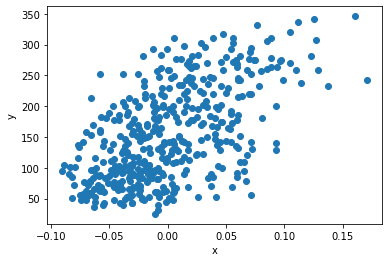

In [ ]:
 import matplotlib.pyplot as plt
 plt.scatter(diabetes.data[:,2],diabetes.target) #3번째 데이터 [:,2](전체 데이터 범위에서 3번째 열만 선택)와 target데이터 선점도 그리기
 plt.xlabel('x')
 plt.ylabel('y')
 plt.show()

**위 그래프를 보면 세번째 특성과 타깃 데이터 사이에 정비례 관계가 있음을 어느정도 알 수 있음**

###훈련 데이터 준비하기

매번 diabetes.data를 입력해서 데이터를 참조하고 번거로우므로 데이터를 미리 변수에 대입해둔다.



In [ ]:
x = diabetes.data[:,2]
y = diabetes.target

<h1>Do it 딥러닝!</h1>
<h2>* 3일차 - 12월 29일(화)</h2>


## 경사하강법
산점도 그래프를 잘 표현하는 직선의 방정식을 찾는 것을 회귀 알고리즘이라 한다.</br>
**경사하강법**은 회귀 알고리즘의 한 종류로 모델이 데이터를 잘 표현할 수 있도록 기울기(변화율)를 사용하여 모델을 조금씩 조정하는 최적화 알고리즘이다.




### 예측값과 변화율


딥러닝 분야에서는 기울기 a를 종종 가중치를 의미하는 w나 계수를 표현하는 θ로 표기한다.</br>
그리고 y는 𝑦̂로 표기한다. 즉, y = ax + b 를 𝑦̂ = wx + b로 이해하자.
#### 예측값
입력과 출력 데이터(x,y)를 통해 규칙(a,b)을 발견하면 모델을 만들었다고 한다.</br>
그 모델에 대해 새로운 입력값을 넣으면 어떤 출력이 나오는데, 이 값이 모델을 통해 **예측한 값**이다.

예를 들어 y = 7x * 4라는 모델의 x에 7을 넣으면 53이 나오는데, 이 값이 모델을 통해 예측한 값이 되는것이다.

####예측값으로 올바른 모델 찾기

훈련 데이터에 잘 맞는 w와 b를 찾는 방법</br>
1. 무작위로 w와 b를 정한다. (무작위로 모델을 만든다.)
2. x에서 샘플 하나를 선택하여 𝑦̂을 계산한다. (무작위로 모델 예측하기)
3. 𝑦̂과 선택한 샘플의 실제 y값을 비교한다. (예측값과 진짜 정답 비교하기)
4. 𝑦̂이 y와 더 가까워지도록 w,b를 조정한다. (모델 조정하기)
5. 모든 샘플을 다 처리할 때까지 다시 2~4 과정을 반복한다.
```
w = 1.0
b = 1.0
```
위와 같이 w와 b의 초기값을 임의로 지정하여</br>
𝑦̂를 구하고, 실제 y와 비교해본다.

In [9]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
x = diabetes.data[:,2]
y = diabetes.target
w = 1.0
b = 1.0
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186886


첫 번째 샘플 x[0]에 대응하는 타겟값 y[0]을 출력하여 𝑦̂값과 비교한다.

In [4]:
print(y[0])

151.0


예측된 𝑦̂값은 1.062인데 반해 타겟값은 151.0으로 차이가 매우 큰 것을 확인할 수 있다.
w와 b값을 임의로 조정하여 타겟값에 가깝게 조절하는데,
어떤 값을 어떻게 바꾸어야 할 지 모르는 상태이므로 단순하게 w값을 0.1만큼 증가시키기로 한다.


In [10]:
w_inc = 1.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


𝑦̂값이 얼마나 증가했는지를 비교할 수 있다.

In [13]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


이 값 (0.062)는 x[0]에 대한 w의 변화율이다.

w_rate에 대한 코드를 수식으로 적어 정리하면

**w_rate =**</br> 
(y_hat_inc - y_hat)</br>
- - -
(w_inc - w)</br>
=</br>
((x[0] * w_inc + b)- (x[0] * w + b))</br>
- - -
(w_inc - w)</br>
=</br>
(x[0] * ((w + 0.1) - w))</br>
- - -
(w + 0.1) - w</br>

= **x[0]**

𝑦̂의 값이 y보다 작으므로 𝑦̂의 값을 증가시켜야 한다.</br>
이 때 변화율은 양수이므로, w의 값을 증가시키면 𝑦̂의 값을 증가시킬 수 있다.</br>

변화율이 음수일때 𝑦̂의 값을 증가시켜야 한다면 w값을 감소시키면 된다.

**하지만 이 방법은 양수와 음수를 구분해야 하므로 번거롭고 복잡하다.**





####변화율로 가중치 업데이트하기
**변화율이 양수일 때 가중치를 업데이트 하는 방법**
변화율이 0보다 클 경우 w가 증가하면 𝑦̂의 값도 증가하기 때문에 변화율을 w에 더하는 방법으로 w를 증가시킬 수 있다.

**변화율이 음수일 때 가중치를 업데이트 하는 방법**
변화율이 0보다 작을 경우 w가 감소하면 𝑦̂의 값이 증가하기 때문에 변화율을 w에 더하는 방법으로 w를 증가시킬 수 있다.

즉 두가지 방법 모두 변화율을 w에 더해주는 방법으로 𝑦̂의 값을 증가시킬 수 있다.

다음은 가중치를 업데이트한 예이다.


In [14]:
w_new = w + w_rate
print(w_new)

1.0616962065186888


#### 변화율로 절편 업데이트하기
이번에는 변화율로 b를 업데이트 한다.</br>
b를 0.1만큼 증가시킨 후 𝑦̂이 얼마나 증가했는지 계산하고 변화율도 계산한다.

In [15]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.1616962065186887
1.0


변화율의 값이 1임을 알 수 있다.</br>
즉, b가 1만큼 증가하면 𝑦̂도 1만큼 증가한다.</br>
절편이 1만큼 증가하면 그래프의 위치가 y방향으로 1만큼 올라가니 당연한 결과이다.</br>

즉, b를 업데이트 하기 위해 변화율이 1이므로 단순히 1을 더하면 된다.



In [16]:
b_new = b + 1
print(b_new)

2.0


𝑦̂을 증가시키기 위해 w와 b를 업데이트 하는 방법에 대해 알아보았으나,</br>
이 방법은 조금 수동적이다.

1. 𝑦̂이 y에 한참 미치지 못하는 값인 경우, w와 b를 더 큰 폭으로 수정할 수 없다.
2. 𝑦̂이 y보다 커지면 𝑦̂을 감소시키지 못한다.

위와 같은 문제가 존재하기 때문이다.